# Tasks from 427 Lab 1

Looking to implement `scale_data()` and `split_data()` functions.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Helper function to create histogram

def create_hist(data, feature):
  '''
  Creates a histogram for the column data provided.
  Uses 20 bins to visualize the data. 
  '''
  # Initialize plot
  fig, ax = plt.subplots(figsize=(9, 6))
  
  # Compute binwidths
  start = min(data); stop = max(data)
  bin_list = np.linspace(start, stop, 20)
  bin_width = (bin_list[-1] - bin_list[0]) / len(bin_list)

  # Plot
  ax.hist(data, bins=bin_list, label=feature, histtype="stepfilled")

  ax.set_xlabel("Scaled " + str(feature))
  ax.set_ylabel("Count per " + str(bin_width))
  
  plt.show()


## Exercise 1: Implement `scale_data()`

In [19]:
def scale_data(input_array):
  '''
  A function to scale the data using the Standard Scaling method.
  Takes a 2d numpy array and outputs the array scaled according to each column.
  '''

  output_arr = input_array.copy()

  # First and last elements are identifiers and not data points
  # So, they will not be scaled with the rest of the columns

  for i in range(np.shape(input_array)[1]):
    mean = np.mean(input_array[:, i].flatten())
    std = np.std(input_array[:, i].flatten())
    output_arr[:, i] = (output_arr[:, i] - mean) / std

  return output_arr

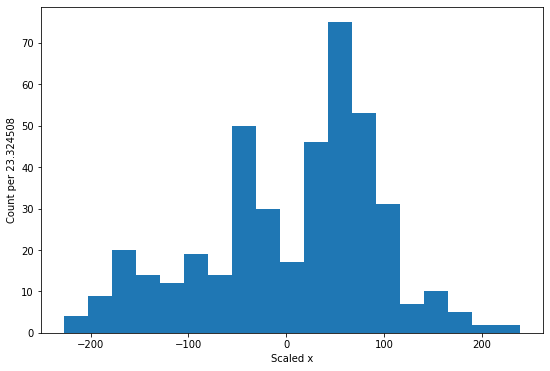

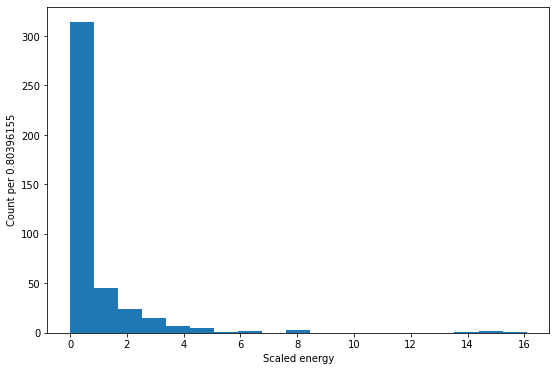

In [21]:
# Open file

path = "/content/drive/MyDrive/Colab Notebooks/427_Labs/Lab_1_Template/hgcal.csv"
csv_data = np.genfromtxt(path, delimiter=',', dtype=np.float64)

# Select numerical portions
csv_data = csv_data[1:, 1:-1]

# Create histogram for x column
create_hist(csv_data[:, 0].flatten(), "x")

# Create histogram for energy column
create_hist(csv_data[:, 5].flatten(), "energy")


## Exercise 2: Implement `split_data()`

In [65]:
def split_data(arr, split_proportions, axis):
  '''
  A function to split data into sub-arrays.
  Takes an input 2D numpy array, a list of splitting proportions, and the axis
  along which to split.
  '''
  quantity_to_split = 0

  if axis == 0:
    quantity_to_split = np.shape(arr)[0]
  else: 
    quantity_to_split = np.shape(arr)[1]
  
  dimensions = []

  for i in split_proportions:
    dimensions.append(int(i * quantity_to_split))
  
  # Output data
  sub_array_list = []

  iter = 0
  low_dim = 0
  for i in range(1, quantity_to_split + 1):
      if dimensions[iter] == i - low_dim:
        iter += 1
        if axis == 0:
          sub_array_list.append(arr[low_dim:i, :])
        elif axis == 1:
          sub_array_list.append(arr[:, low_dim:i])
        low_dim = i

  return sub_array_list


In [66]:
# Test caes from lab 1 template

sub_arrays = split_data(csv_data, [0.5, 0.5], 1)
print(sub_arrays[0].shape, sub_arrays[1].shape)

sub_arrays = split_data(csv_data, [0.6, 0.2, 0.2], 0)
print(sub_arrays[0].shape, sub_arrays[1].shape, sub_arrays[2].shape)

(420, 3) (420, 3)
(252, 6) (84, 6) (84, 6)


The function behaves as expected. 